In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from google.colab import files

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
datasetfile = 'drive/MyDrive/Colab Notebooks/tour.csv'
headernames = ['Age', 'Occupation', 'Gender','MonthlyIncome','ProductPitched','DurationOfPitch','NumberOfPersonVisiting','PitchSatisfactionScore'] #Attribute Names/Atribute columns
data = pd.read_csv(datasetfile, usecols=headernames)
data.head()

,Age,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,ProductPitched,PitchSatisfactionScore,MonthlyIncome
0,41.0,6.0,Salaried,Female,3,Deluxe,2,20993.0
1,49.0,14.0,Salaried,Male,3,Deluxe,3,20130.0
2,37.0,8.0,Free Lancer,Male,3,Basic,3,17090.0
3,33.0,9.0,Salaried,Female,2,Basic,5,17909.0
4,NaN,8.0,Small Business,Male,2,Basic,5,18468.0


In [4]:
data.size

39104

In [5]:
# Drop rows that has NaN values on selected columns
df=data.dropna(subset=['Age','MonthlyIncome','DurationOfPitch','NumberOfPersonVisiting','PitchSatisfactionScore'])

In [6]:
df.size

35240

In [7]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['ProductPitched'] = labelencoder.fit_transform(df['ProductPitched'])
df['Occupation'] = labelencoder.fit_transform(df['Occupation'])

<ipython-input-7-b776bfea5f22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = labelencoder.fit_transform(df['Gender'])
<ipython-input-7-b776bfea5f22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ProductPitched'] = labelencoder.fit_transform(df['ProductPitched'])
<ipython-input-7-b776bfea5f22>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [8]:
df.head()

,Age,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,ProductPitched,PitchSatisfactionScore,MonthlyIncome
0,41.0,6.0,2,1,3,1,2,20993.0
1,49.0,14.0,2,2,3,1,3,20130.0
2,37.0,8.0,0,2,3,0,3,17090.0
3,33.0,9.0,2,1,2,0,5,17909.0
5,32.0,8.0,2,2,3,0,5,18068.0


In [9]:
array = df.values
#type(array)
array

array([[4.1000e+01, 6.0000e+00, 2.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        2.0993e+04],
       [4.9000e+01, 1.4000e+01, 2.0000e+00, ..., 1.0000e+00, 3.0000e+00,
        2.0130e+04],
       [3.7000e+01, 8.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        1.7090e+04],
       ...,
       [5.2000e+01, 1.7000e+01, 2.0000e+00, ..., 3.0000e+00, 1.0000e+00,
        3.1820e+04],
       [1.9000e+01, 1.6000e+01, 3.0000e+00, ..., 0.0000e+00, 5.0000e+00,
        2.0289e+04],
       [3.6000e+01, 1.4000e+01, 2.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.4041e+04]])

In [10]:
#L=np.array([1,2,3,4,5,6,7,8,9,10])
#a=L.reshape(-1,2)
#print(a)

In [11]:
T1=array[0:,0:5]
T2=array[0:,6:8]

print('T1.size:',T1.size)

print('T2.size:',T2.size)

#print(T2)

#T2=T2.reshape(-1,1)

X = np.concatenate((T1, T2), axis=1)

print(X)
y=array[0:,5]

#y=y.reshape(-1,1)
print(y)

T1.size: 22025
T2.size: 8810
[[4.1000e+01 6.0000e+00 2.0000e+00 ... 3.0000e+00 2.0000e+00 2.0993e+04]
 [4.9000e+01 1.4000e+01 2.0000e+00 ... 3.0000e+00 3.0000e+00 2.0130e+04]
 [3.7000e+01 8.0000e+00 0.0000e+00 ... 3.0000e+00 3.0000e+00 1.7090e+04]
 ...
 [5.2000e+01 1.7000e+01 2.0000e+00 ... 4.0000e+00 1.0000e+00 3.1820e+04]
 [1.9000e+01 1.6000e+01 3.0000e+00 ... 3.0000e+00 5.0000e+00 2.0289e+04]
 [3.6000e+01 1.4000e+01 2.0000e+00 ... 4.0000e+00 3.0000e+00 2.4041e+04]]
[1. 1. 0. ... 3. 0. 0.]


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
from sklearn import metrics
neigh = KNeighborsClassifier(n_neighbors=30)

neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


0.775255391600454
[[288  31   0   0   0]
 [ 62 216   0  19   0]
 [  1   0  43   0   3]
 [ 19  37   1  79   9]
 [  0   0   4  12  57]]


In [14]:
#Dimension Reduction
#sfs = SequentialFeatureSelector(neigh, n_features_to_select=4)
#sfs.fit(X_train, y_train)
#X_train_new=sfs.transform(X_train)
#X_train_new.shape

In [15]:
seed = 10
kfold = KFold(n_splits = 10, random_state = seed, shuffle=True)
scores = cross_val_score(neigh, X_train, y_train, cv = kfold)
print('Scores of Each K-Folds:',scores)
print('\nMean score:',scores.mean())

Scores of Each K-Folds: [0.78186969 0.74504249 0.78186969 0.7223796  0.75568182 0.74715909
 0.78977273 0.74715909 0.75568182 0.75568182]

Mean score: 0.7582297836724183


In [16]:

print(neigh.predict([[29,6,2,2,2,3,30000]]))

[3.]


In [17]:
k_range = range(1, 36)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 20
# We append the scores in the dictionary
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X, y)
    y_pred = neigh.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

print(scores)

[1.0, 0.9477866061293984, 0.9250851305334846, 0.841316685584563, 0.8308740068104427, 0.8238365493757094, 0.8192962542565266, 0.8086265607264472, 0.7981838819523269, 0.7861520998864926, 0.7904653802497162, 0.7843359818388195, 0.7897843359818388, 0.7847900113507378, 0.7829738933030647, 0.7786606129398411, 0.775255391600454, 0.7743473325766175, 0.773439273552781, 0.7727582292849036, 0.773439273552781, 0.7732122587968218, 0.7729852440408627, 0.7729852440408627, 0.7743473325766175, 0.7727582292849036, 0.7723041997729853, 0.7709421112372304, 0.7727582292849036, 0.7691259931895573, 0.7704880817253121, 0.7691259931895573, 0.7698070374574347, 0.7677639046538025, 0.7670828603859251]


Text(0, 0.5, 'Testing Accuracy')

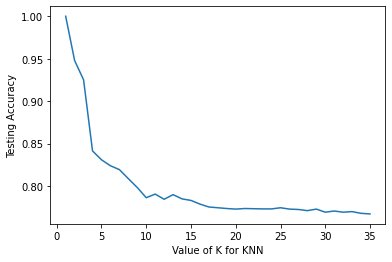

In [18]:

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**INPUT Age	Occupation	Gender	MonthlyIncom**